In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from IPython.display import clear_output

## function plot

In [2]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 3*x+2

In [3]:
f_x(2)

11

In [4]:
def plotF(f):
    start=-5
    plotRange=10
    step=0.1
    N=plotRange/step
    t=np.arange(start,start+plotRange,step)
    y=f(t)
    plt.plot(t,y)

    

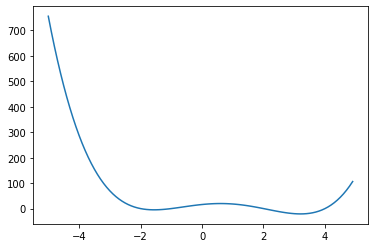

In [5]:
plotF(lambda x:(x+2)*(x+1)*(x-2)*(x-4))

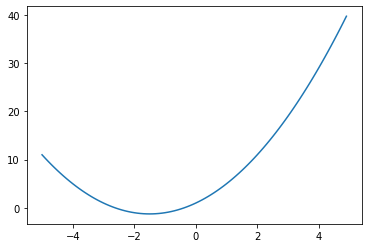

In [6]:
plotF(f_x)

## fixed step for GD

In [7]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3

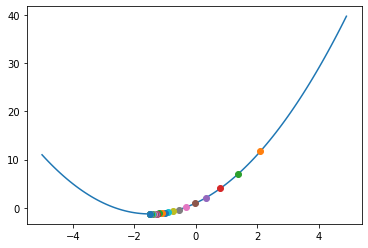

In [8]:
# draw
x=3
step=0
learning_rate=0.1
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    plt.figure()
    fm = plt.get_current_fig_manager()
    fm.canvas.figure = fig
    fig.canvas = fm.canvas
    #print('step: '+str(step))
    plt.plot(x,f_x(x),'o')
    plt.show()
    plt.close()
    clear_output(wait=True)

In [9]:
# property
x=3
step=0
learning_rate=0.1

while(step<500 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    if step%10==0:
        print(abs(f_x(x)))
        print(df_dx(x))
    step+=1
    # plt.figure()
    # fm = plt.get_current_fig_manager()
    # fm.canvas.figure = fig
    # fig.canvas = fm.canvas
    # #print('step: '+str(step))
    # plt.plot(x,f_x(x),'o')
    # plt.show()
    # plt.close()
    # clear_output(wait=True)
print(step)

11.71
7.2
1.1005813730029526
0.77309411328
1.248277320517463
0.08301034833169307
1.249980138857791
0.008913168282854933
1.2499997710166206
0.000957044156964848
1.2499999973600011
0.00010276183387469828
1.2499999999695626
1.1033967894480412e-05
1.2499999999996492
1.1847632812589382e-06
72


## back tracking line algorithm

In [10]:
def backtracking_line(f,df_dx,x,t,verbose=False):
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    if verbose:
        print('g '+str(grad_f))
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return x,t

In [11]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3

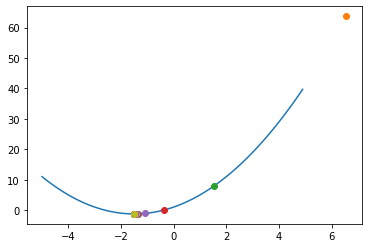

In [12]:
# draw

x=20
step=0
learning_rate=5
display=True
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

## own work for optimal

### part 1 
update learning rate(step) when gradient is small

In [13]:
def backtracking_line(f,df_dx,x,t,verbose=False):

    '''
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f

    '''
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    if verbose:
        print('g '+str(grad_f))
        print('sufficient '+str(f(x)-a*t*grad_f*grad_f))
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return x,t

In [14]:
def f(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3
# property
x=10
step=0
learning_rate=5
display=False#True#
fig = plt.figure()
# plotF(f_x)
plt.close()
t=learning_rate
records=[]
while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    #x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate,verbose=True)
    t=learning_rate
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    suf=f(x)-a*t*grad_f*grad_f

    record=0
    while f(x-t*grad_f)>suf:
        record+=1
        #print(step)
        t=b*t
        suf=f(x)-a*t*grad_f*grad_f
    records.append(record)
    x=x-t*grad_f
    # print(x)
    # print((f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(step,suf,'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

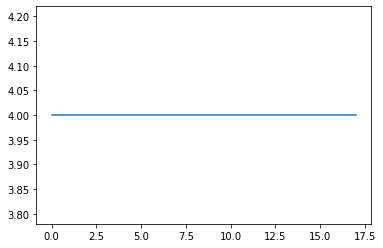

In [15]:
plt.plot(records)

In [51]:
# property
x=10
step=0
learning_rate=5
display=False
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    if (abs(df_dx(x))>1e-3):
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    else:
        learning_rate=0.5
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)

        # x=x-learning_rate*df_dx(x)
    print(x)
    print('l '+str(learning_rate))
    print(abs(f_x(x)))
    print(abs(df_dx(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
    print('s '+str(step))

2.8125
l 0.3125
17.34765625
8.625
s 1
0.1171875
l 0.3125
1.36529541015625
3.234375
s 2
-0.8935546875
l 0.3125
0.8822240829467773
1.212890625
s 3
-1.2725830078125
l 0.3125
1.1982815116643906
0.454833984375
s 4
-1.4147186279296875
l 0.3125
1.242727087577805
0.170562744140625
s 5
-1.4680194854736328
l 0.3125
1.2489772466906288
0.06396102905273438
s 6
-1.4880073070526123
l 0.3125
1.2498561753158697
0.02398538589477539
s 7
-1.4955027401447296
l 0.3125
1.2499797746537942
0.008994519710540771
s 8
-1.4983135275542736
l 0.3125
1.2499971558106897
0.0033729448914527893
s 9
-1.4993675728328526
l 0.3125
1.2499996000358782
0.001264854334294796
s 10
-1.4997628398123197
l 0.3125
1.2499999437550455
0.0004743203753605485
s 11
-1.4998814199061599
l 0.25
1.2499999859387612
0.00023716018768027425
s 12
-1.5
l 0.5
1.25
0.0
s 13


In [41]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

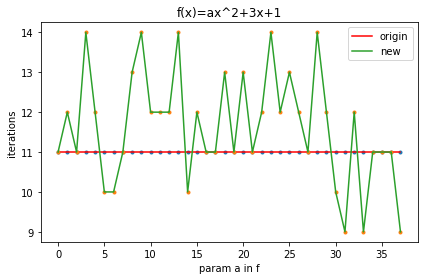

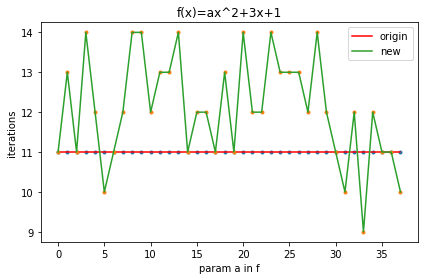

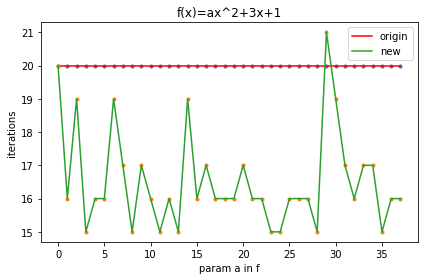

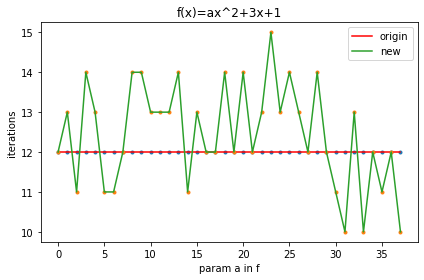

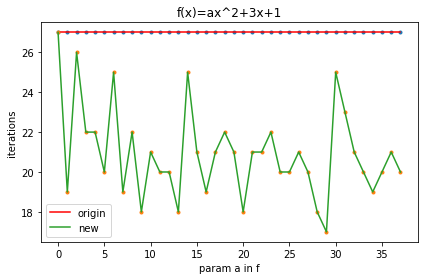

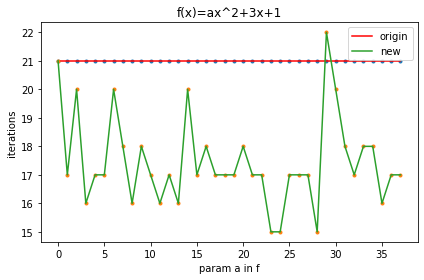

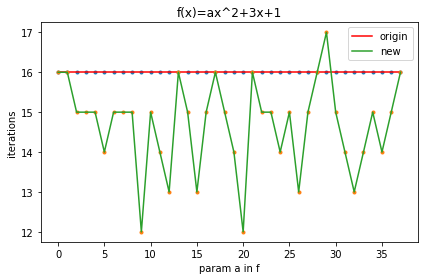

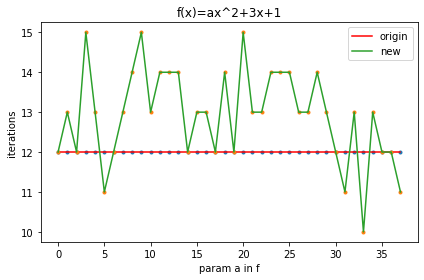

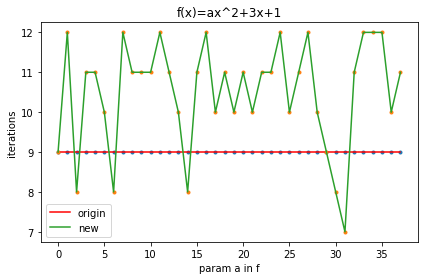

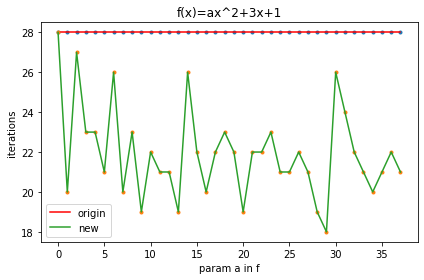

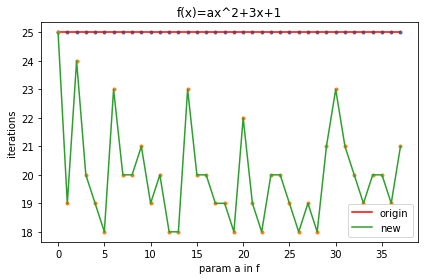

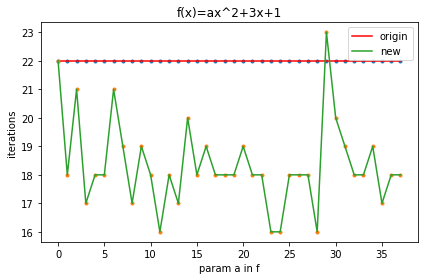

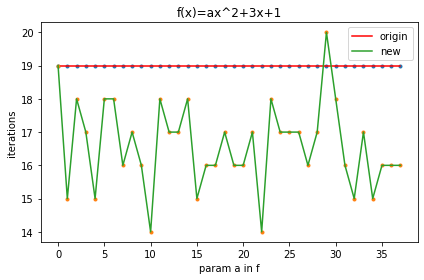

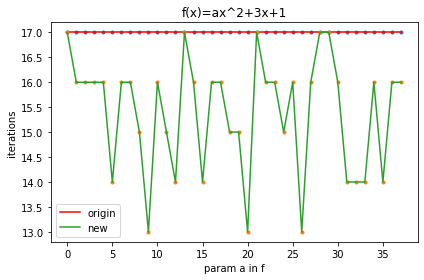

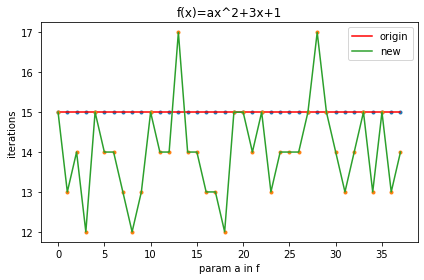

In [75]:
ratios=np.arange(1,20,0.51)
initial_rate=0.8
initial_x=10
N=15
# fig=plt.figure(figsize=(9,9))
for a in range(1,N+1):
    origin_steps=np.zeros(len(ratios))
    new_steps=np.zeros(len(ratios))
    def f_x(x):
        return a*pow(x,2)+x+1

    def df_dx(x):
        return a*2*x+1   
    for i in range(len(ratios)):
        
        # origin
        step=0
        x=initial_x
        learning_rate=initial_rate
        while(step<50 and (abs(df_dx(x))>1e-6)) :
            #x=x-learning_rate*df_dx(x)
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            step+=1
        #print('origin step: '+str(step))
        origin_steps[i]=step
        # new
        step=0
        x=initial_x
        learning_rate=initial_rate
        while(step<50 and (abs(df_dx(x))>1e-6)) :
            #x=x-learning_rate*df_dx(x)
            if (abs(df_dx(x))>1e-2):
                x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            else:
                learning_rate=ratios[i]*learning_rate
                x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            step+=1
        # print('new step: '+str(step))
        new_steps[i]=step
    #plt.subplot(8,2,a)
    plt.plot(origin_steps,'.')
    plt.plot(origin_steps,'-',color='r',label='origin')
    plt.plot(new_steps,'.')
    plt.plot(new_steps,'-',label='new')
    plt.legend()
    plt.xlabel('param a in f')
    plt.ylabel('iterations')
    plt.title('f(x)=ax^2+3x+1')
    plt.tight_layout()
    plt.show()

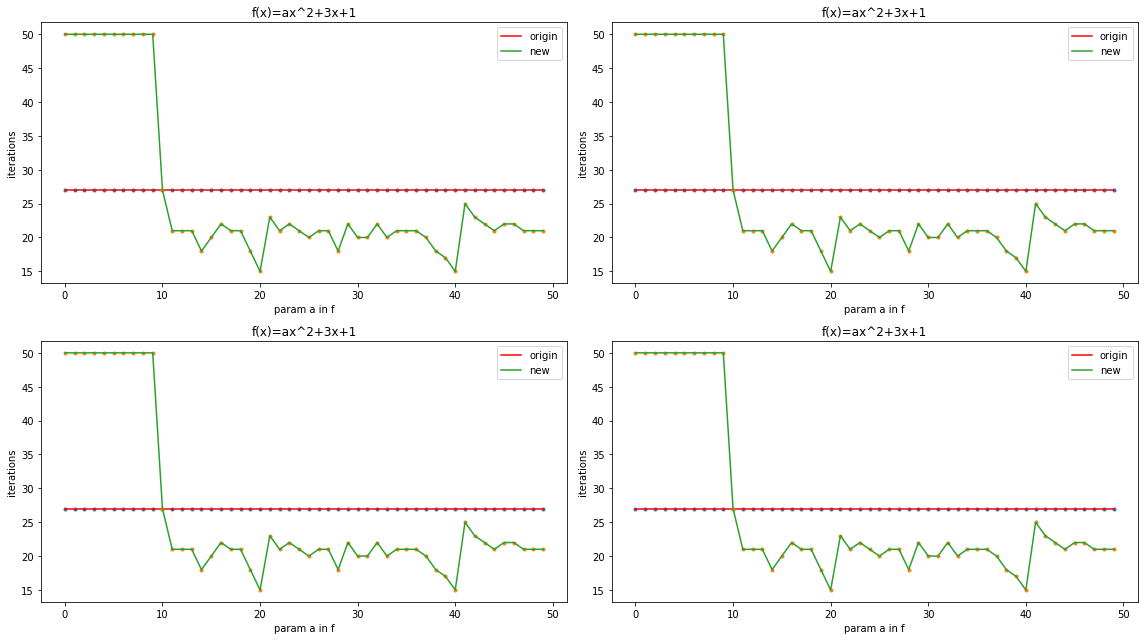

In [63]:
fig=plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(222)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(2,2,3)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(224)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.tight_layout()
plt.show()


In [31]:
print(np.mean(origin_steps))
print(np.mean(new_steps))
print(np.cov(origin_steps))
print(np.cov(new_steps))

17.84313725490196
16.254901960784313
55.81490196078431
22.993725490196084


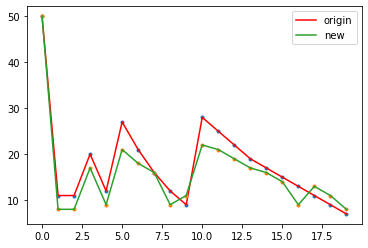

In [73]:
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.show()

### part 2
skate

### part 3
chess strategy: look forward